### Import Libraries

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### Load Dataset

In [19]:
df = pd.read_csv("https://raw.githubusercontent.com/Danazzz/beras-scm/main/csv/Beras.csv")
df

,Tanggal,Luas Panen Padi,GKP Tingkat Petani,GKP Tingkat Penggilingan,GKG Tingkat Penggilingan,Harga Beras Penggilingan,Produksi Beras,Harga Beras,UMP,BBM Solar,Tingkat Konsumsi
0,2021-03-15,10,4000,4150,5050,9465,14419,11200,4960,9600,17161
1,2021-03-16,10,3850,4100,4740,9360,14419,11200,4960,9600,17161
2,2021-03-17,10,4160,4230,4950,9400,14419,11200,4960,9600,17161
3,2021-03-18,10,4120,4190,4730,9340,14419,11200,4960,9600,17161
4,2021-03-19,10,4190,4290,4990,9410,14419,11200,4960,9600,17161
...,...,...,...,...,...,...,...,...,...,...,...
673,2023-12-21,30,6770,6850,7980,13100,14391,14000,5444,6800,17598
674,2023-12-22,30,6600,6760,8050,13095,14391,14000,5444,6800,17598
675,2023-12-27,30,6620,6760,8030,13120,14391,14000,5444,6800,17598
676,2023-12-28,30,6650,6760,8020,13120,14391,14000,5444,6800,17598


### Preprocessing

In [20]:
df['Tanggal'] = pd.to_datetime(df['Tanggal'])
df['Year'] = df['Tanggal'].dt.year
df['Month'] = df['Tanggal'].dt.month

In [21]:
data_mod = df.drop(columns=['Tanggal'])

X = data_mod.drop('Harga Beras', axis=1)
y = data_mod['Harga Beras']

### Split Dataset

In [22]:
cutoff_index = int(len(data_mod) * 0.8)

# Split the dataset into training and testing sets using the calculated index
X_train = X.iloc[:cutoff_index]
X_test = X.iloc[cutoff_index:]
y_train = y.iloc[:cutoff_index]
y_test = y.iloc[cutoff_index:]

### Model Training

In [23]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [24]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the tree
    'min_samples_split': [2, 10, 20]  # Minimum number of samples required to split an internal node
}

# Initialize the RandomForestRegressor
rf = RandomForestRegressor(random_state=42)

# Setup GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Evaluate the best model from grid search
best_rf = grid_search.best_estimator_
best_score = grid_search.best_score_
best_params = grid_search.best_params_

best_rf, best_score, best_params

Fitting 5 folds for each of 36 candidates, totalling 180 fits


(RandomForestRegressor(max_depth=10, n_estimators=50, random_state=42),
 -63894.20518210005,
 {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 50})

Mean Squared Error: 1384875.015495868
R-squared Score: -1.8949418671655596


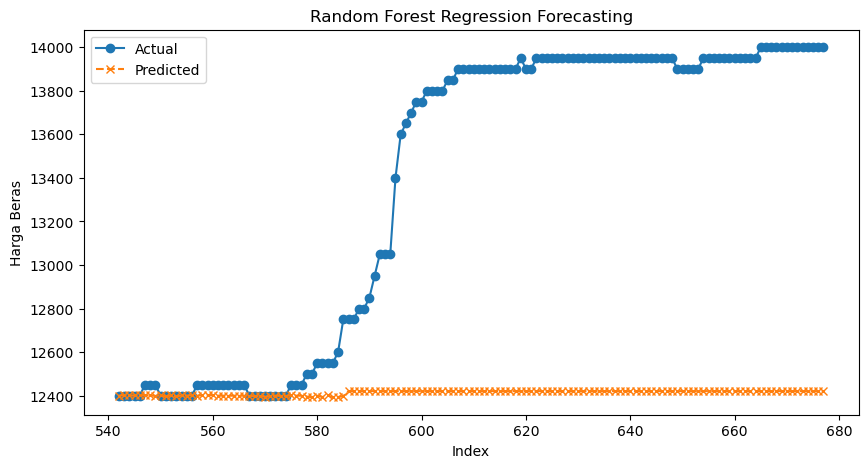

In [25]:
# Make predictions on the testing data using the best Random Forest model
predictions = best_rf.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print('Mean Squared Error:', mse)
print('R-squared Score:', r2)

# Optionally, visualize the actual and predicted values
plt.figure(figsåize=(10, 5))
plt.plot(X_test.index, y_test, label='Actual', marker='o')
plt.plot(X_test.index, predictions, label='Predicted', linestyle='--', marker='x')
plt.xlabel('Index')
plt.ylabel('Harga Beras')
plt.title('Random Forest Regression Forecasting')
plt.legend()
plt.show()

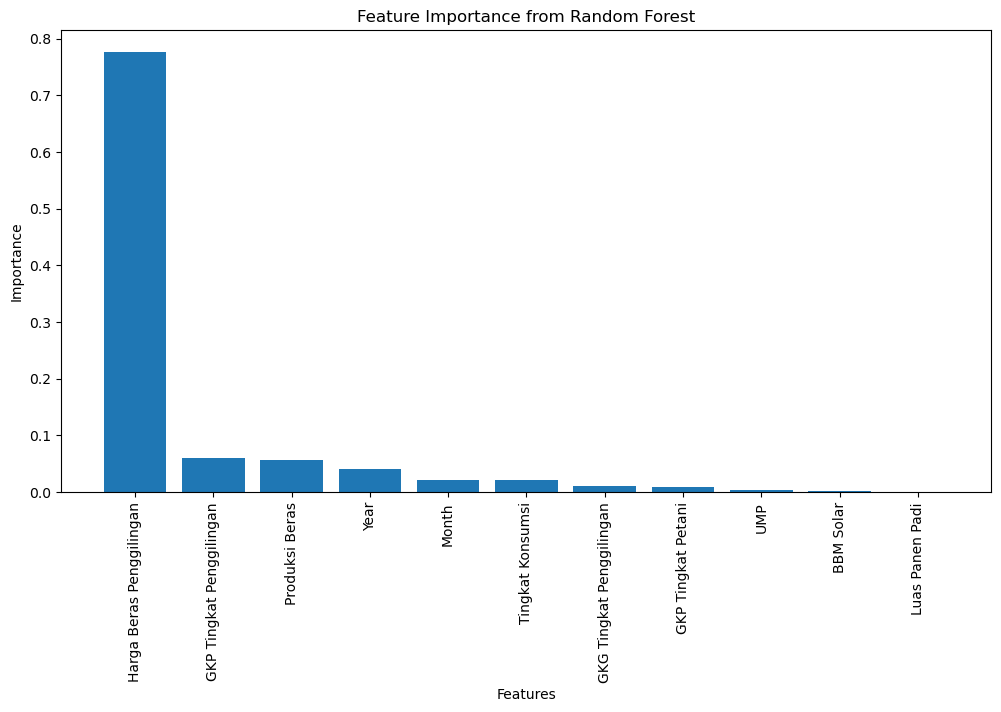

In [26]:
import matplotlib.pyplot as plt
import numpy as np

# Get feature importances from the model
importances = best_rf.feature_importances_
# Sort the feature importances in descending order and get the indices
indices = np.argsort(importances)[::-1]

# Create labels for the x-axis by using feature names sorted by importance
feature_labels = X_train.columns[indices]

# Create a bar plot of the feature importances
plt.figure(figsize=(12, 6))
plt.bar(range(X_train.shape[1]), importances[indices], align='center')
plt.xticks(range(X_train.shape[1]), feature_labels, rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance from Random Forest')
plt.show()

In [27]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score
from math import sqrt

rmse = sqrt(mean_squared_error(df[-len(predictions):]["Harga Beras"], predictions))
mae = mean_absolute_error(df[-len(predictions):]["Harga Beras"], predictions)
print("Root Mean Square Error:", rmse)
print("Mean Absolute Error:", mae)

# R Square
r = r2_score(df[-len(predictions):]["Harga Beras"], predictions)

# Mean Square Error
mse = mean_squared_error(df[-len(predictions):]["Harga Beras"], predictions)

# Menampilkan hasil
print("R Square: {:.4f}".format(r))
print("Mean Square Error:", mse)

Root Mean Square Error: 1176.8071275684338
Mean Absolute Error: 958.9645721925134
R Square: -1.8949
Mean Square Error: 1384875.015495868
